# Neural networks

### Universal approximation theorem - NNs can approximate any continuous function.
A visual demonstration that neural nets can compute any function:
http://neuralnetworksanddeeplearning.com/chap4.html

#### Like any ML algorithm, training a neural netwoek requires minimizing some loss function (for a given structure that maps inputs to outputs). 

- ### The minimization is done using an algorithm called gradient descent
(or a variation called stochastic/minibach gradient descent). 

# Using gradient descent in Linear regression

The simplest machine learning algorithm is linear regression. We will code up linear regression from scratch with a twist: We will use gradient descent, which is also how neural networks learn.

Most of this lesson is pretty much stolen from Jeremy Howard's fast.ai [lesson zero](https://www.youtube.com/watch?v=ACU-T9L4_lI)

- ### In Linear regression we assume that 

- ### $y = w_0 + \sum_i w_i x_i $ 

We look for the $w$ coefficients that give the 'best' prediction for the output ($y$). The best prediction is defined by minimizing some cost function. For linear regression in machine learning task it is usually the mean square error.

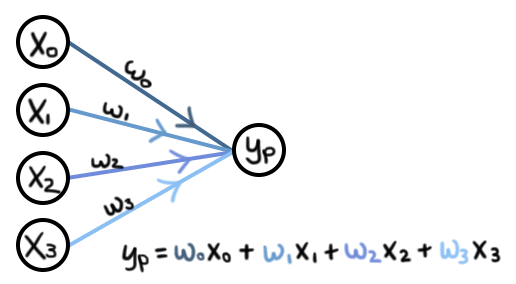

In [1]:
from IPython.display import Image
Image(filename='figs/linear_regression_as_neural_network2.png', width=500)
# Image is taken from https://blog.insightdatascience.com/a-quick-introduction-to-vanilla-neural-networks-b0998c6216a1

## Linear regression from scratch

We will learn the parameters a and b of a line.

In [33]:
%matplotlib inline
from fastai.basics import *
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.random.seed(42)

#### WHAT IS PYTORCH? (as defined at https://pytorch.org/) 

It’s a Python-based scientific computing package targeted at two sets of audiences:

- ### A replacement for NumPy to use the power of GPUs
- ### A deep learning research platform that provides flexibility and speed

#### Chose the true parameters we want to learn.

In [34]:
w = tensor(3.,2); w

tensor([3., 2.])

### Create some data points x and y which lie on the line

In [35]:
n = 100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1) #Under score functions in pytorch means replace the value (update)
x[:5]

tensor([[ 0.6094,  1.0000],
        [ 0.1951,  1.0000],
        [ 0.1481,  1.0000],
        [-0.7694,  1.0000],
        [ 0.3816,  1.0000]])

Tensor is a data structure which is a fundamental building block of PyTorch. Tensors are pretty much like numpy arrays, except that unlike numpy, tensors are designed to take advantage of parallel computation capabilities of a GPU
and more importantly for us - they can keep track of its gradients.

For further reading see [here](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)
    

In [36]:
y = x@w + torch.rand(n) # @ is a matrix product (similar to matmul)

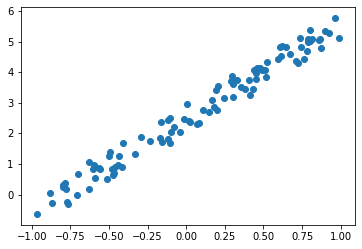

In [37]:
plt.scatter(x[:,0], y);

In [38]:
w = tensor(-3.,-5)

If we could find a way to fit our guess for the coefficients 'a', we could use the exact same method for very complicated tasks (as image recognition). 

In [39]:
y_hat = x@w
mse(y_hat, y)

tensor(75.4221)

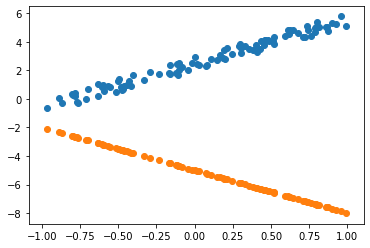

In [40]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [41]:
w = nn.Parameter(w); w

Parameter containing:
tensor([-3., -5.], requires_grad=True)

In [42]:
def mse(y_true, y_pred): return ((y_true - y_pred)**2).mean()

Written in terms of $w_0$ and $w_1$, our **loss function** is:

### $Loss = \frac{1}{n}\sum_n (y_t - (w_0 x_0 + w_1 x_1))^2 = \frac{1}{n}\sum_n (y_t - (w_0 x_0 + w_1))^2$

### So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

To know how we have to change w_0 and w_1 to reduce the loss, we compute the derivatives or gradients.

### $\frac{\partial L}{\partial w_0} = \frac{1}{n}\sum_n -2(y_t - (w_0x_0 + w_1))x$

### $\frac{\partial L}{\partial w_1} = \frac{1}{n}\sum_n -2(y_t - (w_0x_0 + w_1))$

### If we know those we can iteratively take little steps down the gradient to reduce the loss aka **gradient descent**. How big our steps are is determined by the **learning rate**.

### $w_0^{new} = w_0^{old}$ - Learning-Rate $*  \frac{\partial L}{\partial w_0}$
### $w_1^{new} = w_1^{old}$ - Learning-Rate $*  \frac{\partial L}{\partial w_1}$

In [12]:
def update2(iteration):
    y_hat = x@w
    loss = mse(y, y_hat)
    if iteration % 20 == 2: 
        print(loss)
    loss.backward(); #calculate the gradient of a tensor! It is now stored at w.grad
    with torch.no_grad(): # To prevent tracking history (and using memory) (code block where we don't need to track the gradients but only modify the values of tensors)
        w.sub_(lr * w.grad); #Under score means inplace. lr is the learning rate. Good learning rate is a key part of Neural Networks. 
        w.grad.zero_() #We want to zero the gradient before we are re-evaluate it.
    return loss

In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. This is convenient while training RNNs. So, the default action is to accumulate (i.e. sum) the gradients on every loss.backward() call.
Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Else the gradient would point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).

explenations about how pytorch calculates the gradients can be found here (and in many other sources) - https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/

In [13]:
# lr = 0.1
# for t in range(100): update2(t)

In [43]:
def lin(a, b, x): return a*x + b

In [44]:
lr =0.01
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x[:,0], y)
line, = ax.plot(x[:,0], lin(w.detach().numpy()[0] , w.detach().numpy()[1] , x.detach().numpy()[:,0]), c='firebrick')
# line, = ax.plot(x[:,0], y, c='firebrick')
ax.set_title('Loss = 0.00')
plt.close()

def animate(i):
    for t in range(10): l = update2(t)
    ax.set_title('Loss = %.2f' % l);
    line.set_data(x.detach().numpy()[:,0], lin(w.detach().numpy()[0] , w.detach().numpy()[1] , x.detach().numpy()[:,0]));
    return line,

anim = FuncAnimation(fig, animate, frames=70, interval=150, blit=True);

tensor(69.9499, grad_fn=<MeanBackward0>)


In [45]:
# You might have some difficulties running this cell without importing certain packages. 
HTML(anim.to_html5_video())

tensor(48.2548, grad_fn=<MeanBackward0>)
tensor(33.6360, grad_fn=<MeanBackward0>)
tensor(23.7437, grad_fn=<MeanBackward0>)
tensor(17.0136, grad_fn=<MeanBackward0>)
tensor(12.4031, grad_fn=<MeanBackward0>)
tensor(9.2173, grad_fn=<MeanBackward0>)
tensor(6.9923, grad_fn=<MeanBackward0>)
tensor(5.4182, grad_fn=<MeanBackward0>)
tensor(4.2876, grad_fn=<MeanBackward0>)
tensor(3.4613, grad_fn=<MeanBackward0>)
tensor(2.8458, grad_fn=<MeanBackward0>)
tensor(2.3779, grad_fn=<MeanBackward0>)
tensor(2.0148, grad_fn=<MeanBackward0>)
tensor(1.7273, grad_fn=<MeanBackward0>)
tensor(1.4952, grad_fn=<MeanBackward0>)
tensor(1.3045, grad_fn=<MeanBackward0>)
tensor(1.1456, grad_fn=<MeanBackward0>)
tensor(1.0114, grad_fn=<MeanBackward0>)
tensor(0.8968, grad_fn=<MeanBackward0>)
tensor(0.7982, grad_fn=<MeanBackward0>)
tensor(0.7127, grad_fn=<MeanBackward0>)
tensor(0.6381, grad_fn=<MeanBackward0>)
tensor(0.5729, grad_fn=<MeanBackward0>)
tensor(0.5157, grad_fn=<MeanBackward0>)
tensor(0.4653, grad_fn=<MeanBackwar

## Task - try to change the learning rate (the variable 'lr' in my code) and rerun the last three cells.  Try to understand what happens (5 minutes)

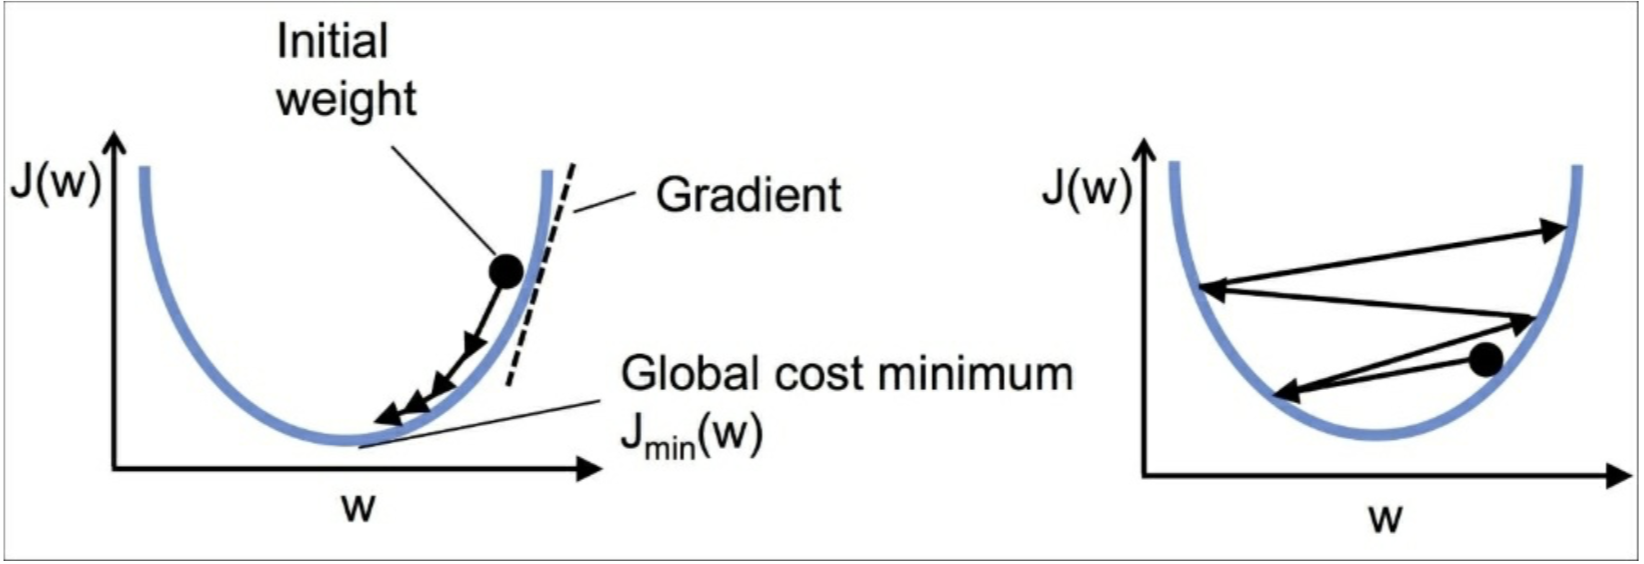

In [96]:
Image(filename='figs/Gradient_descent2.png', width=700)

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.random.seed(42)

### In Deep learning we use a variation of gradient descent called [mini-batch gradient descent](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)
- ### Instead of calculating the gradient over the whole training data before changing model weights (coefficients), we take a subset (batches) of our data, and change the values of the weights after we calculated the gradient oves a subset of our data

# Task for today - use a neural network (NNs) to recognize hand written digits

- ### Neural networks can have many different structures.
- #### Here we will consider fully connected networks
- #### The good news is that in order to undersand them, we only need to understand Logistic regression (and gradient descent).



First we will build a logistic regression 'network' and later see how to generalize the logistic regression in order to use Fully connected NN. 
Later in the course we will use convolutional NN (CNN).
Some of the code was taken from:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627


# Importing relevant Packages

In [48]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torch import nn, optim
from time import time
#Allows showing plots in notebook:
%matplotlib inline
from torchvision import datasets, transforms
#import imageio
np.random.seed(42) # For reproducebility

## Getting the data

In [50]:
# transform for data normalization
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.
# transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

#The  numbers 0.5 that are passed to the transform are the mean and the STD that will normalize each image
#image = (image - mean) / std



In [51]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

#### Checking size and shape of data

In [52]:
print('the number of images in the train set:', len(trainset))
print('the number of images in the validation/test set:', len(valset))

the number of images in the train set: 60000
the number of images in the validation/test set: 10000


In [59]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


- ### Dataset and Dataloader classes provide a very convenient way of iterating over a dataset while training your machine learning model.

- ### We need to iterate over the data because it is very slow to hold all the data at once (see more details [here](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/))

<!-- This provides a very convenient way of separating the data preparation part from the training procedure.  -->

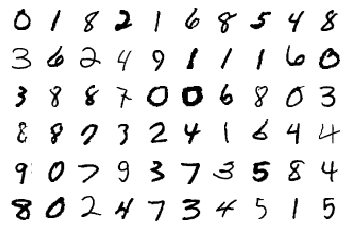

In [60]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### A typical training procedure for a neural network:

- #### Define the neural network that has some learnable parameters (or weights)
- #### Iterate over a dataset of inputs
- #### Process input through the network
- #### Compute the loss (how far is the output from being correct)
- #### Propagate gradients back into the network’s parameters
- #### Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

## Logistic Regression  (The equivalent of linear regression - for classification tasks)


<!-- In Logistic Regression we want to predict the probability for a certain event (e.g., the probability that we see in an image the number 1 or zero).
If we have only 2 classes in the output, the probability in Logistic regression is predicted by:

#### $Probability(Y_i = 1) = \frac{1}{1 + e^{-\sum_i w_i x_i }}$ 

#### and $Probability(Y_i = 0) = 1- \frac{1}{1 + e^{-\sum_i w_i x_i }}$

In Logistic regression (and classification problems) we commonly use the Cross Entropy Loss 

$CrossEntropyLoss = -(y_i log(\hat{y}_i)) - (1-y_i) log(1-\hat{y}_i)) $

where $y_i$ are the true labels and $\hat{y}_i$ are the predicted probability for the label. 

Comment: The Sigmoid is defined as: $\phi(z) = \frac{1}{1 + e^{-z}}$

 -->

### Multiclass logistic regression

In Logistic Regression we want to predict the probability for a certain event (e.g., the probability the image shows the number 1/2/3...).

The output of multiclass logistic regression should be the probability of each event (if we want to classify 0-9 digits we will want 10 numbers representing the probabilities of each event). Therefore, we want to demand that the proboability of each label will:

- 1)  contain only non-negative values 
- 2)  sum to 1

We accomplish this by using the softmax function.

### $softmax(z_i)= \frac{e^{z_i}}{\sum_{j=1}^k e^{z_j}}$  

where in logistics regression $z_j = \sum_i w_{ij} X_i $

where $w$ is a matrix (size inputs x classes_num), and X_i are the features of sample i

### $Probability(Y_i = k | X_i;w) = \frac{\rm{exp}(\sum_i w_{ik} X_i)}{\sum_{m=1}^N \sum_i \rm{exp}(w_{im}  X_i)}$


where N is the number of labels

- This is a generalization of logistic regression to more than than 2 output classes

See more discussion - [here](https://gluon.mxnet.io/chapter02_supervised-learning/softmax-regression-scratch.html) and [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

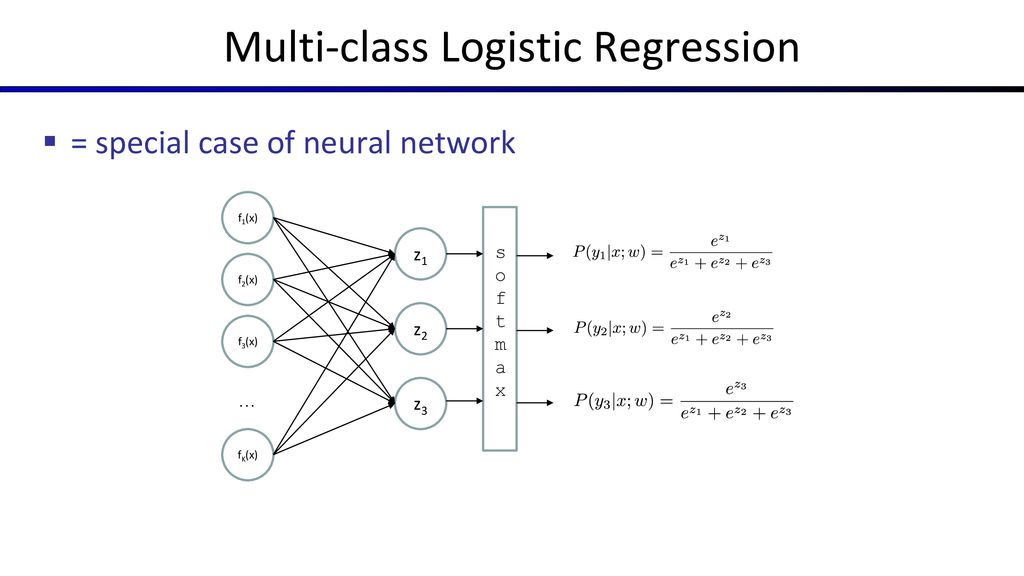

In [24]:
from IPython.display import Image
Image(filename='figs/Log_reg_NN.jpg', width=700)
# Image is taken from https://blog.insightdatascience.com/a-quick-introduction-to-vanilla-neural-networks-b0998c6216a1

- #### Each arrow represent a weight that we want to modify such that we minimize certain loss function
<!-- - It is possible to express mathematically the operations in an ANN as: -->

### Define network structure in pytorch 
If you want to learn more:

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html


### Define Logistic Regression network structure in pytorch 

In [61]:
#define Logistic Regression network structure in pytorch 

class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(784, 10) # This is a layer that has 784 inputs and 10 outputs. 

    def forward(self, x):
        x = self.linear(x)
        return F.log_softmax(x,dim=1) # softmax  is an extension for the sigmoid for multiclass problems - see belowxz

In [62]:
Log_Reg_net = LogisticRegression()
print(Log_Reg_net)

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


Think how would you modify the Logistic regression code to make it a linear regression (we would also need to change the cost function)

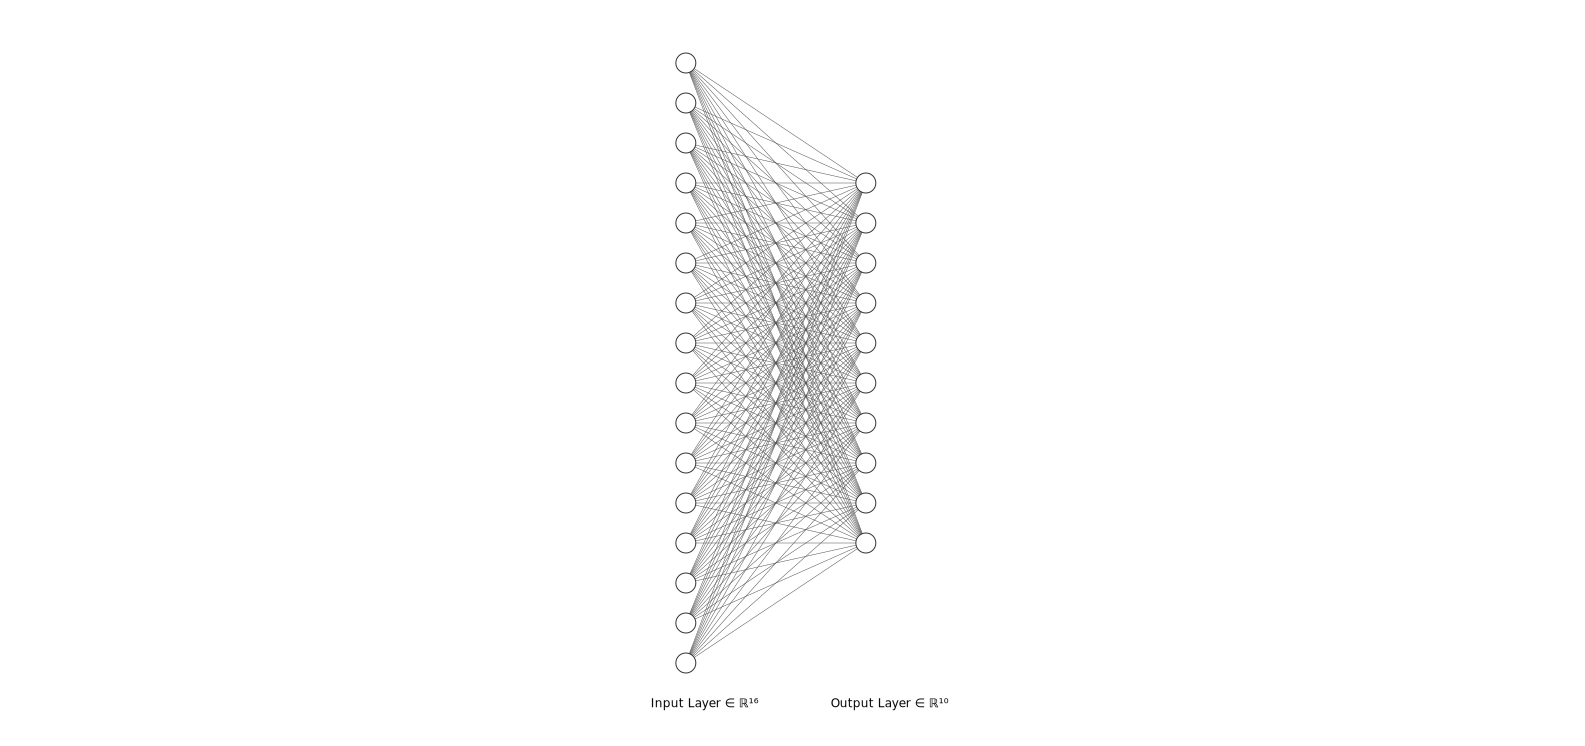

In [168]:
# No need to run this cell
# Plot an RNN - this is a smaller version from what we actually built 
# The plot was created using this website: http://alexlenail.me/ (ALEXANDER LENAIL - MIT PhD student)
from IPython.display import SVG, display
display(SVG('figs/LogRegMNIST.svg'))

### Making a deeper fully connected network using pytorch...

In [70]:
#define network structure in pytorch 
class Net_ANN(nn.Module):
    def __init__(self):
        super(Net_ANN, self).__init__()
        self.linear1 = nn.Linear(784, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
#         self.lin_drop = nn.Dropout(0.1) #regularization method to prevent overfitting. 

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return F.log_softmax(x,dim=1)

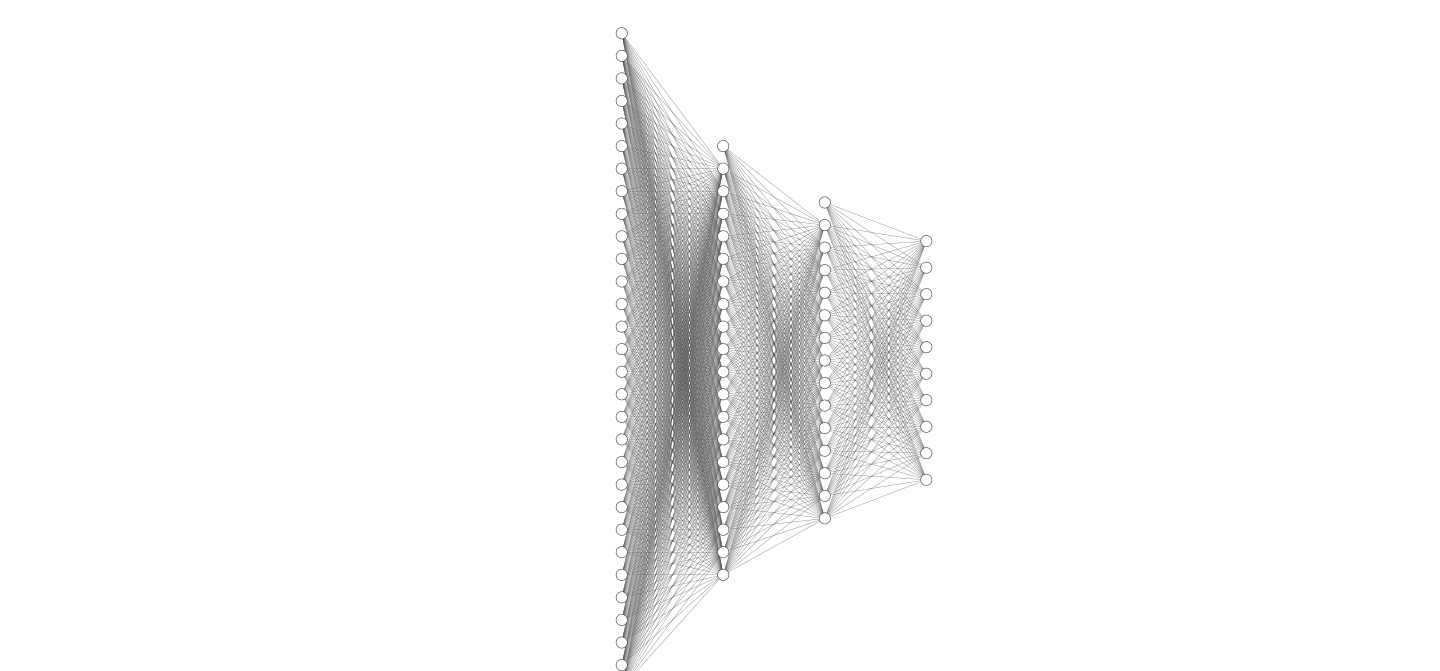

In [71]:
# No need to run this cell
# Plot an RNN - this is a smaller version from what we actually built 
# The plot was created using this website: http://alexlenail.me/ (ALEXANDER LENAIL - MIT PhD student)
from IPython.display import SVG, display
display(SVG('figs/Deeper_network.svg'))

In [72]:
lin_net = Net_ANN()
print(lin_net)

Net_ANN(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)


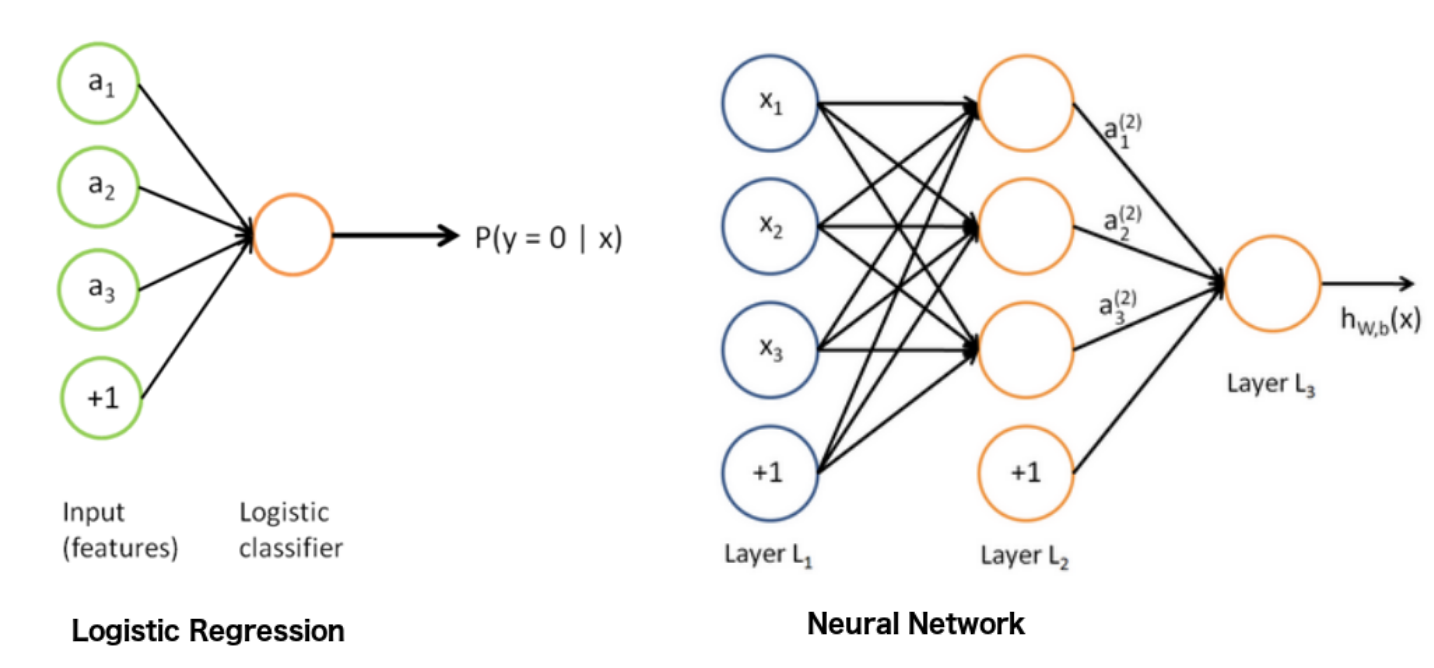

In [73]:
#Image taken from: https://stats.stackexchange.com/questions/366707/a-logistic-regression-with-neural-network-mindset-vs-a-shallow-neural-network
Image(filename='figs/LogReg_NN.png', width=700)

- ### Each arrow represent a weight that we want to modify such that we minimize certain loss function
- ### The non-linearity of fully connected neural networks comes from the ''activation function'' that is used after each layer. One example of activation function is the sigmoid, which is used in logistic regression. 

<!-- - It is possible to express mathematically the operations in an ANN as: -->

### Input and outputs of each layer

Each layer in the fully connected network has dimensions if 
inputs*(outputs+1). The plus one comes from the bias term. 

In [74]:
# The learnable parameters of the NN are returned by lin_net.parameters()
for i in list(lin_net.parameters()):
    print(i.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


# Task 2 

### Create a neural network class with 2 hidden layers that have -  784 inputs, 300 inputs  in the the first hidden layer , 100 in the second hidden layer,  10  outputs

### Activation function - ReLU

### If layers would contain only matrix multiplication, everything would be linear: 
- ### e.g., 2 layers of weight matrices  A and B (x is the input) would give $A(Bx)$, which is linear (in x)
- ### Therefore we need to introduce some non-linearity (activation function). 
- ### The Neural Network with 2 layers of weight matrices  A and B is actually:
### $A(\phi(Bx))$ where $\phi$ is an actication function


The ReLu ativation function is just the max(0,X) - and this what is enabling the NN to be a nonlinear function of the inputs!

Text(0.5, 1.0, 'ReLU')

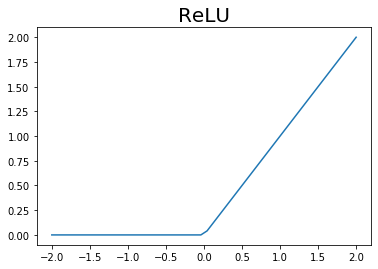

In [75]:
x = np.linspace(-2,2,50)
plt.plot(x,np.maximum(x,0))
plt.title('ReLU',fontsize = 20)

### Using the nework to get a prediction

In [83]:
# An example of how to plug a sample into the network
input1 = torch.randn(1, 784)
out = lin_net(input1) 
# when calling the model ('lin_net(input)') it calls automatically the forward method we defined (via __call__ - see https://github.com/pytorch/pytorch/blob/472be69a736c0b2aece4883be9f8b18e2f3dfbbd/torch/nn/modules/module.py#L487)
print('The output of the random input is:',out)
print('The probabilities are:', np.exp(out.detach().numpy()))

The output of the random input is: tensor([[-2.1952, -2.2301, -2.2860, -2.2925, -2.2149, -2.4725, -2.4860, -2.3780,
         -2.2435, -2.2744]], grad_fn=<LogSoftmaxBackward>)
The probabilities are: [[0.111331 0.107515 0.101677 0.101014 0.109161 0.084374 0.083241 0.092738 0.106086 0.102863]]


### Defining a loss function to optimize:

In [84]:
criterion = nn.NLLLoss() # Negative log liklihood loss function - use this when using softmax. 
#For regression task we sould use:
#criterion = nn.MSELoss
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1) # Reshape the image batch to be a the batch_size x pixels in image

logps = lin_net(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss
print('We have 64 images in each bach, and size of output is 10...:',logps.shape)

We have 64 images in each bach, and size of output is 10...: torch.Size([64, 10])


Read [here](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood) to understand better the Negative log liklihood loss function 

### Calculating the gradients of the (loss) tensor

In [85]:
lin_net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(lin_net.linear3.bias.grad)

loss.backward(retain_graph=True) #Computes the gradient of all components current tensor

print('conv1.bias.grad after backward')
print(lin_net.linear3.bias.grad)




conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0998, -0.0474,  0.0533, -0.0535, -0.0467,  0.0757, -0.0172, -0.0069,
         0.0571,  0.0853])


### Updating the weights using optimizer (basically built in methods for optimization such as SGD, Adam and etc.)

In [86]:
optimizer = optim.SGD(lin_net.parameters(), lr=0.003, momentum=0.9)
print('Before backward pass: \n',list(lin_net.parameters())[0].data.numpy()[1][0])
loss.backward(retain_graph=True) 
optimizer.step()
print('After backward pass: \n',list(lin_net.parameters())[0].data.numpy()[1][0])

Before backward pass: 
 -0.019788623
After backward pass: 
 -0.01977094


it’s crucial you choose the correct learning rate as otherwise your network will either fail to train, or take much longer to converge. [Here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) you can read more about the momentum term in SGD.

### The  effective value of the gradient (V) at step t in SGD with momentum:
### $V_t = \beta V_{t-1} + (1-\beta) \nabla_w L(W,X,y)$ 

## Combining it all together:  training the whole network

In [93]:
train_losses = []
train_counter = []
test_losses = []
# test_counter = [i*len(trainloader.dataset) for i in range(n_epochs + 1)]
log_interval = 100 #Determines the number of print outputs while training



### Defining function for the training procedure

In [88]:
def train_ANN(net,criterion,optimizer,epoch,trainloader):
    net.train() # When using dropout this is necessary! it states that we are on a training mode.
    for batch_idx, (data, target) in enumerate(trainloader):
        # Flatten MNIST images into a 784 long vector
        data = data.view(data.shape[0], -1) 
        # gradient has to be manually set to zero because otherwise gradients are accumulated
        optimizer.zero_grad()
        # Calculates the output for some bach of figures
        output = net(data)
        # Calculates the loss
        loss = criterion(output, target)
        # This is where gradients are calculated (for the loss tensor)
        loss.backward()
        #And optimizes its weights here by some gradient descent like scheme
        optimizer.step()
        #Just to print how the progress is doing:
        if batch_idx % log_interval == 0:
            if batch_idx > 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))


### Defining function for testing

In [89]:
def test_ANN(net,criterion,testloader,batchsize=64,nsamples=10000):
    net.eval() # basically states that we are in evaluation mode. When using dropout necessary!
    test_loss = 0
    correct = 0
    flag_size = 0
    with torch.no_grad():
#     for data, target in testloader:
        for i, (data, target) in enumerate(testloader):
            data = data.view(data.shape[0], -1)  # Flatten MNIST images into a 784 long vector
            output = net(data) # get predictions
            test_loss += criterion(output, target).item() # Sum over the losses 
            pred = output.data.max(1, keepdim=True)[1] # Get label with maximum probability
            correct += pred.eq(target.data.view_as(pred)).sum() #Comparing the true labels to the predicted labels
            if i*batchsize > nsamples: # Stop loop if I estimated the performance on more than 10000 samples
                flag_size = 1
                break
    if flag_size == 1:
        max_len = i*batchsize
    else:
        max_len = len(testloader.dataset)
    test_loss /= max_len
    test_losses.append(test_loss)
    print('\n Avg. loss: {:.5f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    test_loss, correct, max_len,
    100. * correct / max_len))

In [90]:
n_epochs = 4 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_ANN(lin_net,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_ANN(lin_net,criterion,trainloader)
    print('Performance on the test set:')
    test_ANN(lin_net,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.608179
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.719440
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.445993
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.658913
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.346097
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.515316
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.536099
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.300879
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.375823

Training Time for one epoch (in minutes) = 0.14802521467208862
Performance on the train set:

 Avg. loss: 0.00500, Accuracy: 9172/10048 (91.282%)

Performance on the test set:

 Avg. loss: 0.00477, Accuracy: 9117/10000 (91.170%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.245839
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.387537
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.261578
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.546563
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.271268
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.229354
Train Epoch: 2 [44800

### Saving the trained network

In [91]:
PATH = './MNIST_ANN1.pth'
torch.save(lin_net.state_dict(), PATH)

# # If we want to load the network later:
# lin_net.load_state_dict(torch.load(PATH))


## Task 3: Try to change the learning rate and train a network again


In [176]:
network3 = Net_ANN()
optimizer = optim.SGD(network3.parameters(), lr=0.003, momentum=0.9)



In [181]:
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_ANN(network3,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_ANN(lin_net,criterion,trainloader)
    print('Performance on the test set:')
    test_ANN(lin_net,criterion,valloader)

### Training more while reducing the learning rate

In [92]:
optimizer = optim.SGD(lin_net.parameters(), lr=0.0003, momentum=0.9)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
  train_ANN(lin_net,criterion,optimizer,epoch,trainloader)
  print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
  print('Performance on the train set:')
  test_ANN(lin_net,criterion,trainloader)
  print('Performance on the test set:')
  test_ANN(lin_net,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.091901
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.127079
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.099077
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.046130
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.232175
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.225447
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.094369
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.103764
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.079104

Training Time for one epoch (in minutes) = 0.14710144996643065
Performance on the train set:

 Avg. loss: 0.00203, Accuracy: 9713/10048 (96.666%)

Performance on the test set:

 Avg. loss: 0.00227, Accuracy: 9569/10000 (95.690%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.201786
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.075368
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.045900
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.146555
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.100193
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.124831
Train Epoch: 2 [44800

## Optimizers

The choice of which optimizer we choose might be very important. It will determine how fast the network will be able to learn. Adam is a very popular choice (read more [here](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c) about Adam). 

###  Using Adam optimizer

In [25]:
optimizer = optim.Adam(lin_net.parameters(), lr=0.0001)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
    train_ANN(lin_net,criterion,optimizer,epoch,trainloader)
    print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
    print('Performance on the train set:')
    test_ANN(lin_net,criterion,trainloader)
    print('Performance on the test set:')
    test_ANN(lin_net,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.046871
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.151102
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.118114
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.162011
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.146878
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.164444
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.072792
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.049885
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.217422

Training Time for one epoch (in minutes) = 0.15700089931488037
Performance on the train set:

Test set: Avg. loss: 0.00193, Accuracy: 9764/10048 (97.174%)

Performance on the test set:

Test set: Avg. loss: 0.00209, Accuracy: 9616/10000 (96.160%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.194436
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.138395
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.063788
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.216409
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.138768
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.051421
Tra

In [94]:
network4 = Net_ANN()
optimizer = optim.Adam(network4.parameters(), lr=0.003)
n_epochs = 2 #Number of epocs
time0 = time()  
for epoch in range(1, n_epochs + 1):
  train_ANN(network4,criterion,optimizer,epoch,trainloader)
  print("\nTraining Time for one epoch (in minutes) =",(time()-time0)/60)
  print('Performance on the train set:')
  test_ANN(network4,criterion,trainloader)
  print('Performance on the test set:')
  test_ANN(network4,criterion,valloader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.463259
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.311501
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.244596
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.350147
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.276184
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.122284
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.263669
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.142809
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.222196

Training Time for one epoch (in minutes) = 0.156873885790507
Performance on the train set:

 Avg. loss: 0.00331, Accuracy: 9456/10048 (94.108%)

Performance on the test set:

 Avg. loss: 0.00339, Accuracy: 9347/10000 (93.470%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.198144
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.185939
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.061906
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.250492
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.227201
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.135247
Train Epoch: 2 [44800/6

## Visualize our predictions

Predicted Digit = 5


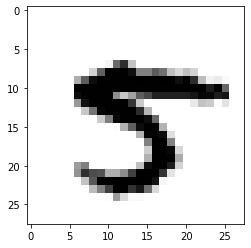

In [96]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = lin_net(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

### Visualize mistakes (try to understand if we have a reasonable result)

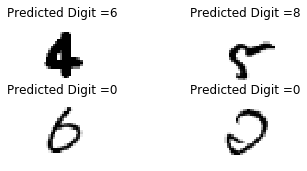

In [97]:
num_stop = 3
num_now =0 
for images,labels in valloader:
    if num_now > num_stop:
        break
    for i in range(len(labels)):
        if num_now > num_stop:
            break
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = lin_net(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label != pred_label):
            num_now = num_now + 1
            plt.subplot(num_stop, 2, num_now)
            plt.axis('off')
            plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
            title1 = 'Predicted Digit =' +str(probab.index(max(probab)))
            plt.title(title1)
#             plt.title('my random fig') 




# Normalizing Inputs

Normalizing the inputs speed up the training of a neural network.

For more reading whey should we normalize inputs in NN's see these links [1](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd) , [2](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/) , [3](https://www.jeremyjordan.me/batch-normalization/)

## BatchNormalization 

Normalize the activation values such that the hidden representation doesn’t vary drastically and also helps us to get improvement in the training speed.

## Task 4: Train a network with batch normalization and Adam optimizer. 

In [29]:
#define network structure in pytorch with batch normalization
class Net_ANN_batchN(nn.Module):
    def __init__(self):
        super(Net_ANN_batchN, self).__init__()
        self.linear1 = nn.Linear(784, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
        self.dense1_bn = nn.BatchNorm1d(128)
        self.dense2_bn = nn.BatchNorm1d(64)
#         self.lin_drop = nn.Dropout(0.1) #regularization method to prevent overfitting. 

    def forward(self, x):
#         x = nn.BatchNorm1d(F.relu(self.linear1(x)),128)
        x = F.relu(self.dense1_bn(self.linear1(x)))
#         print(x.shape)
#         x = F.relu(self.lin_drop(self.linear2(x)))
        x = F.relu(self.dense2_bn(self.linear2(x)))
#         print(x.shape)
        x = self.linear3(x)
#         print(x.shape)
        return F.log_softmax(x,dim=1)

# Regularization in Neural Networks

- L2 and L1 regularization
- Dropout
- Data augmentation
- Early stopping